In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import scipy
from scipy import io

import matplotlib.pyplot as plt
import numpy as np

from os import listdir
from os.path import isfile, join

import pandas as pd
#Load Data
import os
import glob
import csv

In [0]:
###################################Read Data
RSA_data = pd.read_csv("/content/drive/My Drive/ML/RSA_Dataset.csv")
Visibility_Data = pd.read_csv("/content/drive/My Drive/ML/thesis_dataset/test/AllDataDublinAirport.csv", parse_dates=['date'])


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,9,10,11,13,14,15,24,25,30,38,39,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:

############################################# Get Coordinates
RSA_data['ITM-x'] = pd.to_numeric(RSA_data['ITM-x'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(float)
RSA_data['ITM-y'] = pd.to_numeric(RSA_data['ITM-y'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(float)
x0 = 708818.16
y0 = 738347.41
x1 = RSA_data['ITM-x'].values
y1 = RSA_data['ITM-y'].values
d2 = np.square( x1 - x0 )  + np.square( y1 - y0 ) 
distances = np.sqrt( d2 )
df = pd.DataFrame(data=distances, columns=["column1"])
RSA_data['distance'] = df['column1']
del RSA_data['accnum2']
del RSA_data['accnum1']
del RSA_data['minutes']
test = RSA_data.loc[(RSA_data.distance < 5000)]

test.rename(columns={'year':'Year'}, inplace=True)
test.rename(columns={'month':'Month'}, inplace=True)
test.rename(columns={'day':'Day'}, inplace=True)
test.rename(columns={'hour':'Hour'}, inplace=True)
test.loc[test['Year'] == 5, 'Year'] = 2005
test.loc[test['Year'] == 6, 'Year'] = 2006
test.loc[test['Year'] == 7, 'Year'] = 2007
test.loc[test['Year'] == 8, 'Year'] = 2008
test.loc[test['Year'] == 9, 'Year'] = 2009
test.loc[test['Year'] == 10, 'Year'] = 2010
test.loc[test['Year'] == 11, 'Year'] = 2011
test.loc[test['Year'] == 12, 'Year'] = 2012
test.loc[test['Year'] == 13, 'Year'] = 2013
test.loc[test['Year'] == 14, 'Year'] = 2014
test.loc[test['Year'] == 15, 'Year'] = 2015
test.loc[test['Year'] == 16, 'Year'] = 2016

test2 = test.filter(['type', 'Day', 'Month', 'Year', 'Hour', 'IG-x', 'IG-y', 'ITM-x', 'ITM-y', 'distance'])
#test2['light'] = pd.to_numeric(test2['light'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
############################### Operations on Visibility Data
Visibility_Data['Year'] = Visibility_Data['date'].dt.year
Visibility_Data['Month'] = Visibility_Data['date'].dt.month
Visibility_Data['Day'] = Visibility_Data['date'].dt.day
Visibility_Data['Hour'] = Visibility_Data['date'].dt.hour
Visibility_Data['Weekday'] = Visibility_Data['date'].dt.weekday

In [0]:
merged = test2.merge(Visibility_Data, on=['Year', 'Month', 'Day', 'Hour'], how='right')

del merged['ind']
del merged['ind.1']
del merged['ind.2']
del merged['wetb']
del merged['dewpt']
del merged['vappr']
del merged['rhum']
del merged['msl']
del merged['ind.3']

del merged['ind.4']
del merged['wddir']
del merged['ww']
del merged['w']
del merged['sun']
del merged['clht']
del merged['clamt']

In [0]:
merged.loc[merged.type>0,'Accident']=1

In [0]:
merged2 = merged
del merged2['date']
del merged2['wdsp']

In [0]:
traffic_volume_data_processed = pd.read_csv("/content/drive/My Drive/ML/thesis_dataset/test/AllDataProcessedCARSNRA.csv",index_col=False)
del traffic_volume_data_processed['Unnamed: 0']

In [0]:
traffic_volume_data_processed.rename(columns={'HourSlot':'Hour'}, inplace=True)
traffic_volume_data_processed.rename(columns={'MonthSlot':'Month'}, inplace=True)
traffic_volume_data_processed.rename(columns={'Day':'Nameofweek'}, inplace=True)
traffic_volume_data_processed.rename(columns={'DaySlot':'Day'}, inplace=True)

In [0]:
forGettingProba = traffic_volume_data_processed.loc[((traffic_volume_data_processed.Year==2017) & (traffic_volume_data_processed.Month==1) )]

del forGettingProba['Nameofweek']
del forGettingProba['Date']

In [0]:
merged3 = traffic_volume_data_processed.merge(merged2, on=['Year', 'Month', 'Day', 'Hour'], how='left')

In [0]:

merged3 =merged3.loc[merged3.Year<=2016]
del merged3['IG-x']
del merged3['IG-y']
del merged3['ITM-x']
del merged3['ITM-y']
del merged3['distance']
del merged3['Nameofweek']
del merged3['WEEKDAY']
del merged3['Date']


In [0]:
merged4 = merged3
del merged4['Month']
del merged4['Day']
#del merged4['Year']
del merged4['Hour']
del merged4['Weekday']
merged4=merged4.fillna(0)

In [0]:
del merged4['rain']

In [0]:
del merged4['vis']

In [0]:
merged4.loc[merged4.Accident>0.0,'Accident']=1

In [0]:
del merged4['temp']

In [0]:
merged4

,Volume_of_Traffic,Year,Holiday,hr_sin,hr_cos,month_sin,month_cos,weekday_sin,weekday_cos,DaySlot_sin,DaySlot_cos,type,Accident
25381,791,2016,1,0.000000,1.000000,0.0,1.000000,-0.433884,-0.900969,0.000000,1.00000,0.0,0.0
25382,1185,2016,1,0.258819,0.965926,0.0,1.000000,-0.433884,-0.900969,0.000000,1.00000,0.0,0.0
25383,933,2016,1,0.500000,0.866025,0.0,1.000000,-0.433884,-0.900969,0.000000,1.00000,0.0,0.0
25384,727,2016,1,0.707107,0.707107,0.0,1.000000,-0.433884,-0.900969,0.000000,1.00000,0.0,0.0
25385,763,2016,1,0.866025,0.500000,0.0,1.000000,-0.433884,-0.900969,0.000000,1.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58887,3526,2013,0,-0.965926,0.258819,-0.5,0.866025,0.781831,0.623490,-0.201299,0.97953,0.0,0.0
58888,2584,2013,0,-0.866025,0.500000,-0.5,0.866025,0.781831,0.623490,-0.201299,0.97953,0.0,0.0
58889,1665,2013,0,-0.707107,0.707107,-0.5,0.866025,0.781831,0.623490,-0.201299,0.97953,0.0,0.0
58890,1196,2013,0,-0.500000,0.866025,-0.5,0.866025,0.781831,0.623490,-0.201299,0.97953,0.0,0.0


In [0]:
Y = merged4['Accident']
X = merged4.drop(['Accident'], axis = 1)

In [0]:
X = X.drop(['type'], axis = 1)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)


In [0]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [0]:
# separate minority and majority classes
not_ACCIDENT = X[X.Accident==0.0]
ACCIDENT = X[X.Accident==1.0]

In [0]:
from sklearn.utils import resample
# upsample minority
ACCIDENT_upsampled = resample(ACCIDENT,
                          replace=True, # sample with replacement
                          n_samples=len(not_ACCIDENT), # match number in majority class
                          random_state=27) # reproducible results

In [0]:
upsampled = pd.concat([not_ACCIDENT, ACCIDENT_upsampled])


In [0]:
y_train = upsampled.Accident
X_train = upsampled.drop('Accident', axis=1)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
from sklearn.metrics import recall_score

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.5874910479828122

In [0]:
recall_score(y_test, upsampled_pred)

0.7333333333333333

In [0]:
jackpot = upsampled.predict_proba(forGettingProba)
jackpot2 = pd.DataFrame(data=jackpot, columns=["column1", "column2"])
forGettingProba['Jackpot3'] = jackpot2['column2'].values


In [0]:
forGettingProba2 =  forGettingProba

In [0]:
duplicate = traffic_volume_data_processed.loc[((traffic_volume_data_processed.Year==2017) & (traffic_volume_data_processed.Month==1) )]
forGettingProba2['WEEKDAY'] = duplicate['WEEKDAY'].values
forGettingProba2['Month'] = duplicate['Month'].values
forGettingProba2['Day'] = duplicate['Day'].values
forGettingProba2['Hour'] = duplicate['Hour'].values
forGettingProba2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Volume_of_Traffic,Year,Holiday,hr_sin,hr_cos,month_sin,month_cos,weekday_sin,weekday_cos,DaySlot_sin,DaySlot_cos,Jackpot3,WEEKDAY,Month,Day,Hour
16631,815,2017,1,0.000000,1.000000,0.0,1.0,-0.781831,0.62349,0.000000,1.00000,0.258792,6,1,1,0
16632,1215,2017,1,0.258819,0.965926,0.0,1.0,-0.781831,0.62349,0.000000,1.00000,0.266942,6,1,1,1
16633,912,2017,1,0.500000,0.866025,0.0,1.0,-0.781831,0.62349,0.000000,1.00000,0.243873,6,1,1,2
16634,781,2017,1,0.707107,0.707107,0.0,1.0,-0.781831,0.62349,0.000000,1.00000,0.229168,6,1,1,3
16635,848,2017,1,0.866025,0.500000,0.0,1.0,-0.781831,0.62349,0.000000,1.00000,0.223551,6,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,6398,2017,0,-0.965926,0.258819,0.0,1.0,0.781831,0.62349,-0.201299,0.97953,0.552991,1,1,31,19
17371,4290,2017,0,-0.866025,0.500000,0.0,1.0,0.781831,0.62349,-0.201299,0.97953,0.434329,1,1,31,20
17372,3386,2017,0,-0.707107,0.707107,0.0,1.0,0.781831,0.62349,-0.201299,0.97953,0.382272,1,1,31,21
17373,2468,2017,0,-0.500000,0.866025,0.0,1.0,0.781831,0.62349,-0.201299,0.97953,0.329193,1,1,31,22


In [0]:
bakchodi = forGettingProba2.groupby(['WEEKDAY']).mean()
bakchodi

,Volume_of_Traffic,Year,Holiday,hr_sin,hr_cos,month_sin,month_cos,weekday_sin,weekday_cos,DaySlot_sin,DaySlot_cos,Jackpot3,Month,Day,Hour
WEEKDAY,,,,,,,,,,,,,,,
0,5153.866667,2017.0,0.0,-3.885781e-17,-1.128727e-16,0.0,1.0,0.000000,1.000000,-1.224992e-02,0.120463,0.449374,1.0,16.0,11.5
1,5443.608333,2017.0,0.0,-3.885781e-17,-1.128727e-16,0.0,1.0,0.781831,0.623490,1.224992e-02,0.120463,0.455781,1.0,17.0,11.5
2,5450.447917,2017.0,0.0,-3.932040e-17,-1.133353e-16,0.0,1.0,0.974928,-0.222521,4.531033e-02,-0.105586,0.458159,1.0,14.5,11.5
3,5657.802083,2017.0,0.0,-3.932040e-17,-1.133353e-16,0.0,1.0,0.433884,-0.900969,2.312861e-02,-0.112545,0.481054,1.0,15.5,11.5
4,5781.458333,2017.0,0.0,-3.932040e-17,-1.133353e-16,0.0,1.0,-0.433884,-0.900969,-7.170190e-17,-0.114897,0.500077,1.0,16.5,11.5
5,4329.531250,2017.0,0.0,-3.932040e-17,-1.133353e-16,0.0,1.0,-0.974928,-0.222521,-2.312861e-02,-0.112545,0.427245,1.0,17.5,11.5
6,3775.558333,2017.0,0.2,-3.885781e-17,-1.128727e-16,0.0,1.0,-0.781831,0.623490,-3.624826e-02,0.115532,0.391131,1.0,15.0,11.5


In [0]:
bakchodi['Hour2']=bakchodi.index

Text(0, 0.5, 'Likelihood of having an accident')

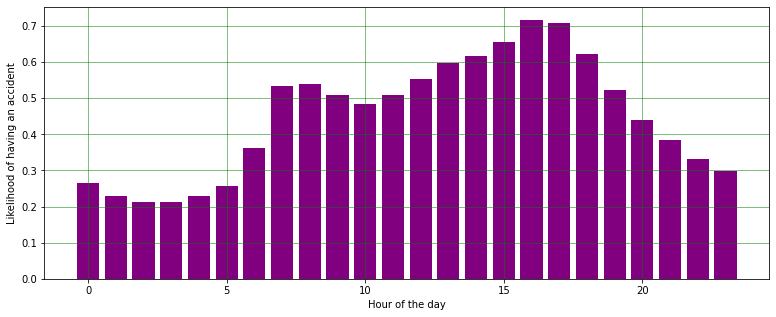

In [0]:
fig, ax = plt.subplots(figsize=(13,5))
xticks = ['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00',
          '10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']
ax.bar(bakchodi['Hour2'],bakchodi['Jackpot3'], color='purple', label="Weekdays")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Hour of the day')
plt.ylabel('Likelihood of having an accident')



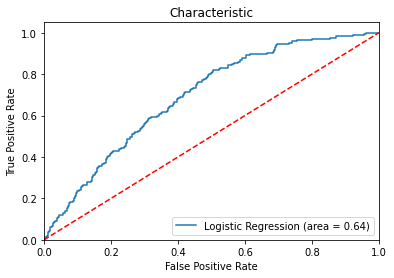

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, upsampled.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, upsampled.predict_proba(X_test)[:,1])




plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Characteristic')
plt.legend(loc="lower right")
plt.show()


In [0]:
from sklearn.metrics import accuracy_score
sqrt(mean_squared_error(y_test, upsampled_pred))

0.5892528376344919

In [0]:
recall_score(y_test, upsampled_pred)

0.7151515151515152

In [0]:
import xgboost
from xgboost import XGBClassifier
model = XGBClassifier(gamma=0.5,learning_rate=0.2,max_depth=5,nthread=1,n_estimators=200)



In [0]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_upsampled = model.fit(X_train, y_train)
upsampled_pred = xgb_upsampled.predict(X_test)


In [0]:

test_pred = xgb_upsampled.predict_proba(X_test)
test_pred

array([[9.9941409e-01, 5.8593857e-04],
       [9.6683800e-01, 3.3162013e-02],
       [9.9759960e-01, 2.4003694e-03],
       ...,
       [9.9977803e-01, 2.2196848e-04],
       [6.5781188e-01, 3.4218809e-01],
       [9.9994934e-01, 5.0691728e-05]], dtype=float32)

In [0]:
from sklearn.metrics import precision_score
precision_score(y_test, upsampled_pred)

0.05182341650671785

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score

accuracy_score(y_test, upsampled_pred)

0.9245643351635235

In [0]:
recall_score(y_test, upsampled_pred)

0.16363636363636364

In [0]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, upsampled_pred)

0.1506326092146097

In [0]:
from sklearn.metrics import f1_score
f1_score(y_test, upsampled_pred)

0.08151382823871907

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, upsampled_pred))

0.5892528376344919

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, xgb_upsampled.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_upsampled.predict_proba(X_test)[:,1])




plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Characteristic')
plt.legend(loc="lower right")
plt.show()


In [0]:
from sklearn.svm import SVC

upsampled = SVC(probability=True)
upsampled.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.5337789448555741

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
sqrt(mean_squared_error(y_test, upsampled_pred))

0.6828912178184733

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, upsampled.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, upsampled.predict_proba(X_test)[:,1])




plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Characteristic')
plt.legend(loc="lower right")
plt.show()


In [0]:
from sklearn.neighbors import KNeighborsClassifier
algo_kNN = KNeighborsClassifier(n_neighbors=8)
algo_kNN.fit(X_train, y_train)

upsampled_pred = algo_kNN.predict(X_test)



In [0]:
# Checking accuracy
recall_score(y_test, upsampled_pred)

0.14545454545454545

In [0]:
mean_absolute_error(y_test, upsampled_pred)

0.08128431606588685

In [0]:
sqrt(mean_squared_error(y_test, upsampled_pred))

0.2851040442818847